<a href="https://colab.research.google.com/github/valderruten/Curso.Prep.Henry/blob/master/DataPraiCarlosAndresValderruten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importación de paquetes y librerias necesarias y acceso a archivo de información

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, f_oneway, kruskal, chi2_contingency
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from google.colab import drive
drive.mount('/content/drive')

# Ubicación del archivo dataset
file_path = '/content/drive/MyDrive/DiplomadoBigData/datosLimpios.txt'
df = pd.read_csv(file_path)#, encoding='ISO-8859-1')
df.head()


Mounted at /content/drive


,ID,EDAD,PLAN_BENEFICIOS,SEDE,NOMBRE_DIAG,PESO,TALLA,IMC,CARDIOVASCULAR,PULMONAR,...,COVID1,COVID2,COVID3,GENERO,IDENTGEN,ORIGSEX,GRUPO_ETNICO,NIVELEDUCATIVO,TIPODISCAPAC,OCUPACION
0,1,6,7,14,80,21.0,114,16.16,1,1,...,1,1,1,1,1,1,5,5,1,1
1,2,19,7,14,120,57.0,151,25.00,2,2,...,1,1,1,2,1,1,5,8,2,3
2,3,19,7,14,15,51.0,173,17.04,2,2,...,2,2,2,2,1,1,5,4,2,2
3,4,19,7,14,154,57.0,151,25.00,2,2,...,1,1,1,2,1,1,5,8,2,3
4,5,20,7,14,40,65.0,165,23.88,2,2,...,1,1,1,2,1,1,5,8,2,13


#Verificación de valores nulos

In [ ]:
# Comprobación de valores nulos

print(df.isnull().sum())
df.info()

ID                       0
EDAD                     0
PLAN_BENEFICIOS          0
SEDE                     0
NOMBRE_DIAG              0
PESO                     0
TALLA                    0
IMC                      0
CARDIOVASCULAR           0
PULMONAR                 0
NEUROLOGICO              0
MENTAL                   0
OSTEOMUSCULAR            0
BODEX                    0
RESULTADOIMC             0
ESCALA_DISNEA            0
RIESGO_CARDIOVASCULAR    0
EPOCCONFIRMADO           0
CLASIFISUI               0
DISCAPACIDAD             0
COVID1                   0
COVID2                   0
COVID3                   0
GENERO                   0
IDENTGEN                 0
ORIGSEX                  0
GRUPO_ETNICO             0
NIVELEDUCATIVO           0
TIPODISCAPAC             0
OCUPACION                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------       

#***ANÁLISIS UNIVARIADO***
---



##1. Impacto de la Discapacidad en la Salud Cardiovascular

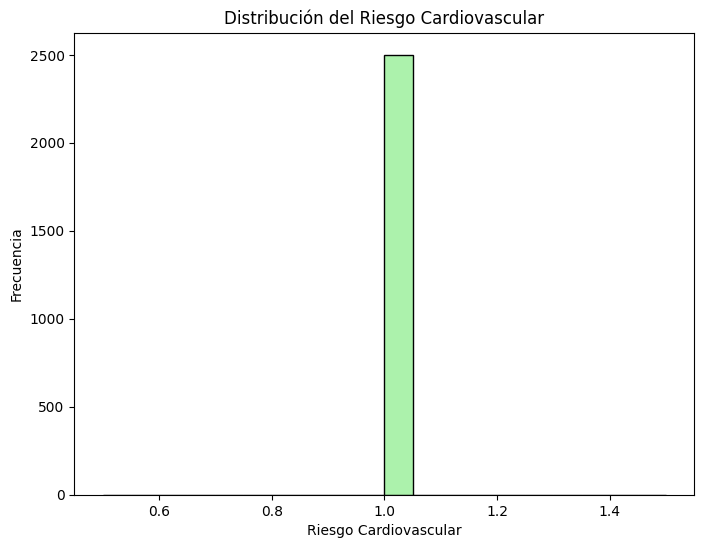

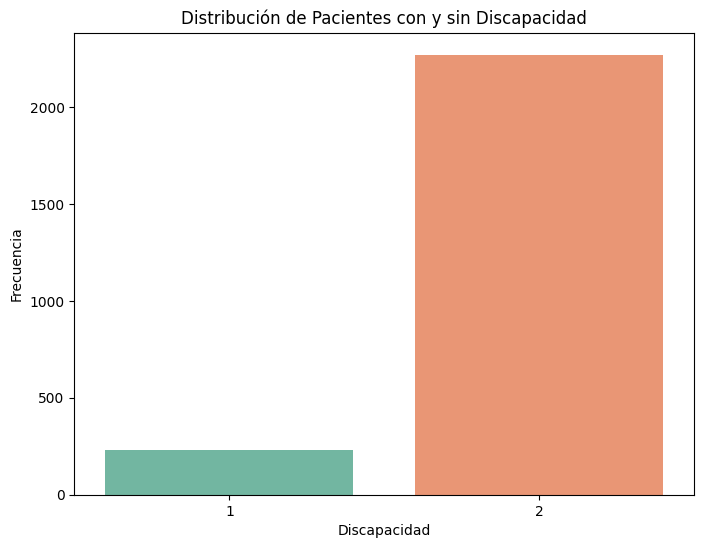

In [ ]:
# Histograma o gráfico de barras para la distribución del Riesgo Cardiovascular
plt.figure(figsize=(8, 6))
sns.histplot(df['RIESGO_CARDIOVASCULAR'], bins=20, color='lightgreen')
plt.title('Distribución del Riesgo Cardiovascular')
plt.xlabel('Riesgo Cardiovascular')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras para la frecuencia de pacientes con y sin discapacidad (con ajuste)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='DISCAPACIDAD', hue='DISCAPACIDAD', palette='Set2', dodge=False)
plt.title('Distribución de Pacientes con y sin Discapacidad')
plt.xlabel('Discapacidad')
plt.ylabel('Frecuencia')
plt.legend([],[], frameon=False)  # Eliminar la leyenda si no es necesaria
plt.show()


##2. Diferencias Étnicas en el Riesgo Cardiovascular

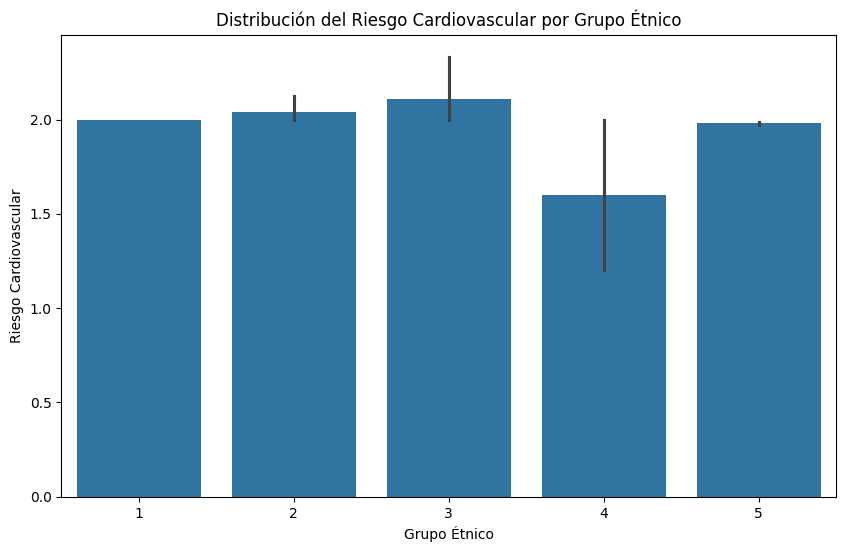

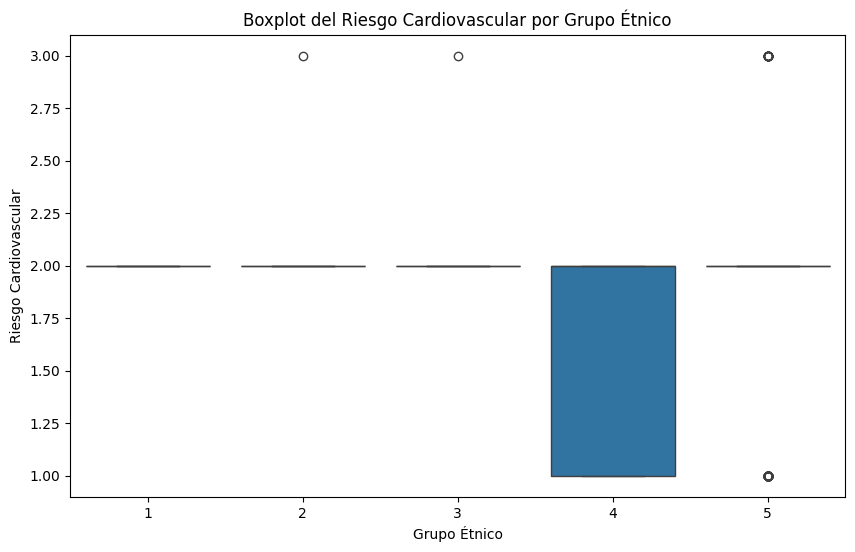

In [ ]:
# Gráfico de barras para la distribución del Riesgo Cardiovascular por grupo étnico
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='GRUPO_ETNICO', y='CARDIOVASCULAR')
plt.title('Distribución del Riesgo Cardiovascular por Grupo Étnico')
plt.xlabel('Grupo Étnico')
plt.ylabel('Riesgo Cardiovascular')
plt.show()

# Boxplot para visualizar la variación del riesgo cardiovascular entre grupos étnicos
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='GRUPO_ETNICO', y='CARDIOVASCULAR')
plt.title('Boxplot del Riesgo Cardiovascular por Grupo Étnico')
plt.xlabel('Grupo Étnico')
plt.ylabel('Riesgo Cardiovascular')
plt.show()


##3. Diferencias Étnicas en el Índice de Masa Corporal (IMC)

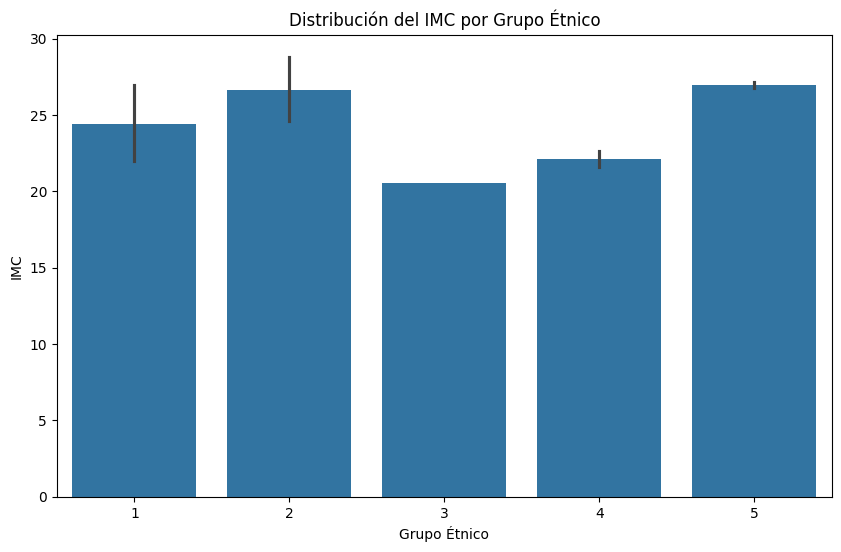

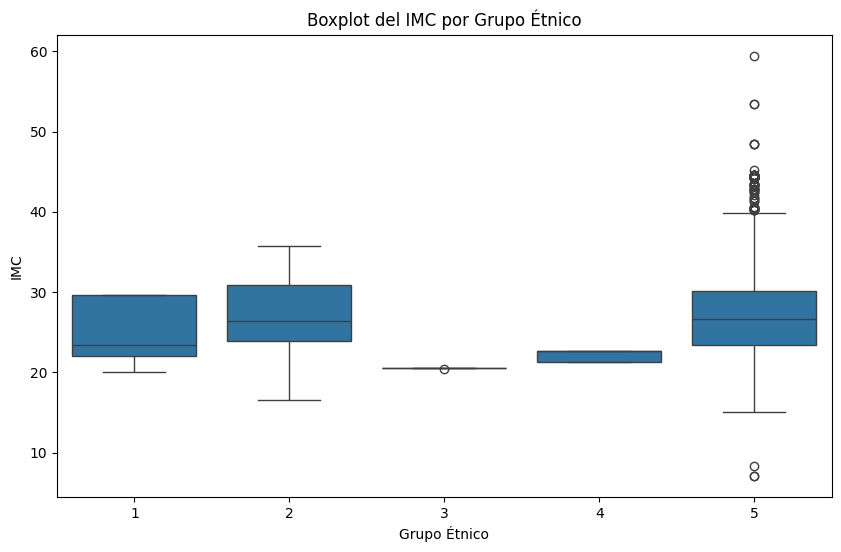

In [ ]:
# Gráfico de barras para la distribución del IMC por grupo étnico
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='GRUPO_ETNICO', y='IMC')
plt.title('Distribución del IMC por Grupo Étnico')
plt.xlabel('Grupo Étnico')
plt.ylabel('IMC')
plt.show()

# Boxplot para visualizar las diferencias en el IMC por grupo étnico
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='GRUPO_ETNICO', y='IMC')
plt.title('Boxplot del IMC por Grupo Étnico')
plt.xlabel('Grupo Étnico')
plt.ylabel('IMC')
plt.show()


##Relación entre el nivel educativo y el índice de masa corporal (IMC)

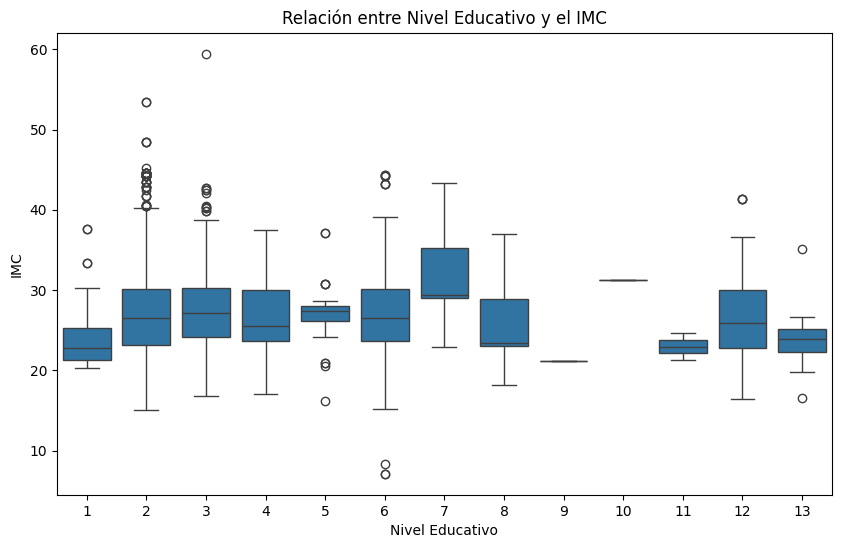

In [ ]:
# Boxplot para visualizar la relación entre el IMC y el nivel educativo
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='NIVELEDUCATIVO', y='IMC')
plt.title('Relación entre Nivel Educativo y el IMC')
plt.xlabel('Nivel Educativo')
plt.ylabel('IMC')
plt.show()


#***ANALISIS BIVARIADO***

##1. Relación entre el IMC y la Salud Mental:

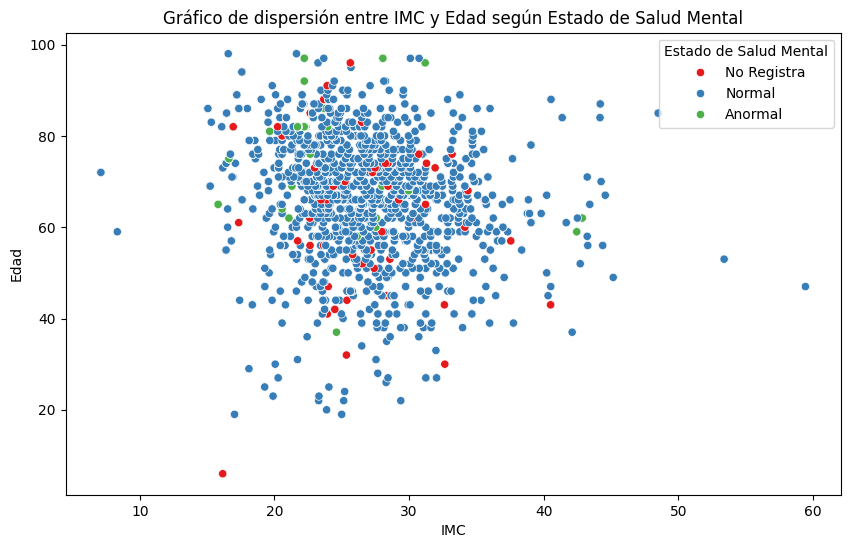

Tabla de Contingencia:
Estado_Salud_Mental  Anormal  No Registra  Normal
IMC_Categoria                                    
Bajo Peso                 11            4     121
Normal                    46           33     724
Sobrepeso                 22           30     860
Obesidad                  14           22     614

Estadístico Chi-cuadrado: 26.474414251349707
Valor p: 0.0001815979330451479
Grados de libertad: 6
Tabla esperada (frecuencias esperadas si no hubiera asociación):
[[  5.05717713   4.83966413 126.10315874]
 [ 29.85965614  28.57536985 744.56497401]
 [ 33.91283487  32.45421831 845.63294682]
 [ 24.17033187  23.1307477  602.69892043]]


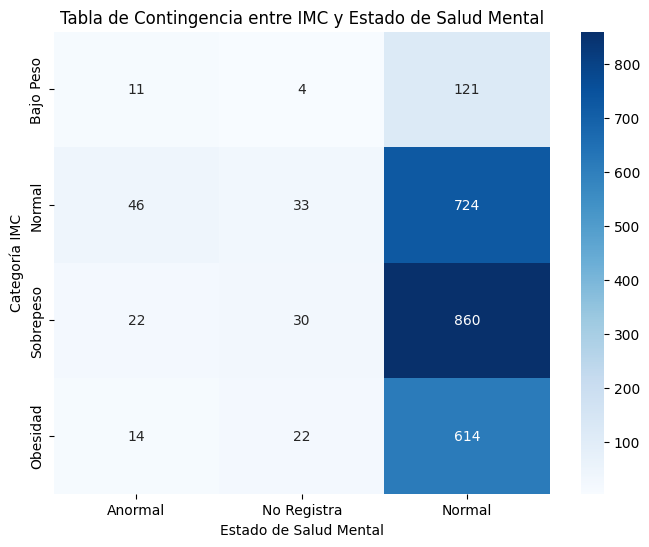

In [ ]:

# Mapeo de los valores numéricos a las etiquetas de texto
df['Estado_Salud_Mental'] = df['MENTAL'].replace({
    1: 'No Registra',
    2: 'Normal',
    3: 'Anormal'
})

# Verificar los primeros valores
df[['MENTAL', 'Estado_Salud_Mental']].head()
# Crear un diccionario de mapeo de códigos a etiquetas
estado_mental_map = {1: 'No Registra', 2: 'Normal', 3: 'Anormal'}

# Reemplazar los valores en la columna 'Estado_Salud_Mental_COD'
df['Estado_Salud_Mental'] = df['MENTAL'].replace(estado_mental_map)

# Verificar el cambio
df[['MENTAL', 'Estado_Salud_Mental']].head()

# Gráfico de dispersión entre IMC y Edad, con el estado de salud mental como color
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='IMC', y='EDAD', hue='Estado_Salud_Mental', palette='Set1')  # 'Estado_Salud_Mental' con las etiquetas cambiadas
plt.title('Gráfico de dispersión entre IMC y Edad según Estado de Salud Mental')
plt.xlabel('IMC')
plt.ylabel('Edad')
plt.legend(title='Estado de Salud Mental')
plt.show()

# Crear las categorías de IMC
df['IMC_Categoria'] = pd.cut(df['IMC'], bins=[0, 18.5, 24.9, 29.9, float('inf')],
                             labels=['Bajo Peso', 'Normal', 'Sobrepeso', 'Obesidad'])

# Cambiar etiquetas de Estado de Salud Mental
df['Estado_Salud_Mental'] = df['MENTAL'].replace({
    1: 'No Registra',
    2: 'Normal',
    3: 'Anormal'
})

# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df['IMC_Categoria'], df['Estado_Salud_Mental'])
print("Tabla de Contingencia:")
print(tabla_contingencia)

# Realizar prueba de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print(f"\nEstadístico Chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
print(f"Grados de libertad: {dof}")
print("Tabla esperada (frecuencias esperadas si no hubiera asociación):")
print(expected)

# Visualización de la tabla de contingencia
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_contingencia, annot=True, fmt="d", cmap="Blues")
plt.title('Tabla de Contingencia entre IMC y Estado de Salud Mental')
plt.ylabel('Categoría IMC')
plt.xlabel('Estado de Salud Mental')
plt.show()



##2. Impacto de la Discapacidad en la Salud Cardiovascular

Mann-Whitney U: U-statistic = 265561.0 p-value = 0.20339463722990292


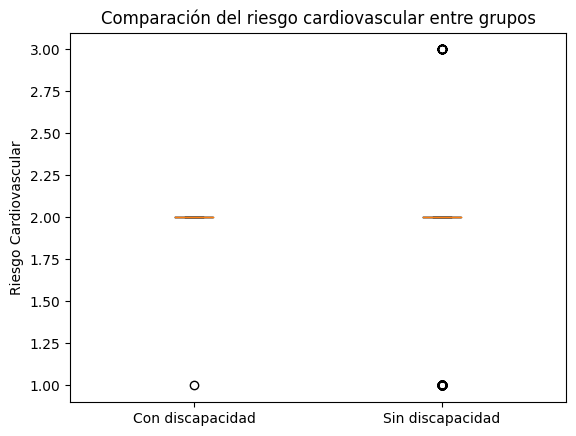

In [ ]:
# Separar los datos en dos grupos: con y sin discapacidad
grupo_con_discapacidad = df[df['DISCAPACIDAD'] == 1]
grupo_sin_discapacidad = df[df['DISCAPACIDAD'] == 2]

# Aplicar la prueba de Mann-Whitney U
U_statistic, p_value = stats.mannwhitneyu(grupo_con_discapacidad['CARDIOVASCULAR'],
                                            grupo_sin_discapacidad['CARDIOVASCULAR'])
print("Mann-Whitney U: U-statistic =", U_statistic, "p-value =", p_value)

# Crear un boxplot para visualizar la distribución
plt.boxplot([grupo_con_discapacidad['CARDIOVASCULAR'], grupo_sin_discapacidad['CARDIOVASCULAR']])
plt.xticks([1, 2], ['Con discapacidad', 'Sin discapacidad'])
plt.ylabel('Riesgo Cardiovascular')
plt.title('Comparación del riesgo cardiovascular entre grupos')
plt.show()

In [ ]:
pip install --upgrade statsmodels

#3. Diferencias Étnicas en el Riesgo Cardiovascular

[5, 2, 3, 1, 4]
Categories (5, int64): [1, 2, 3, 4, 5]
[1]
Categories (1, int64): [1]

Tabla de Contingencia:
RIESGO_CARDIOVASCULAR     1
GRUPO_ETNICO               
1                         9
2                        24
3                         9
4                         5
5                      2454

Estadístico Chi-cuadrado: 0.0
Valor p: 1.0
Grados de libertad: 0

Tabla esperada (frecuencias esperadas si no hubiera asociación):
[[   9.]
 [  24.]
 [   9.]
 [   5.]
 [2454.]]


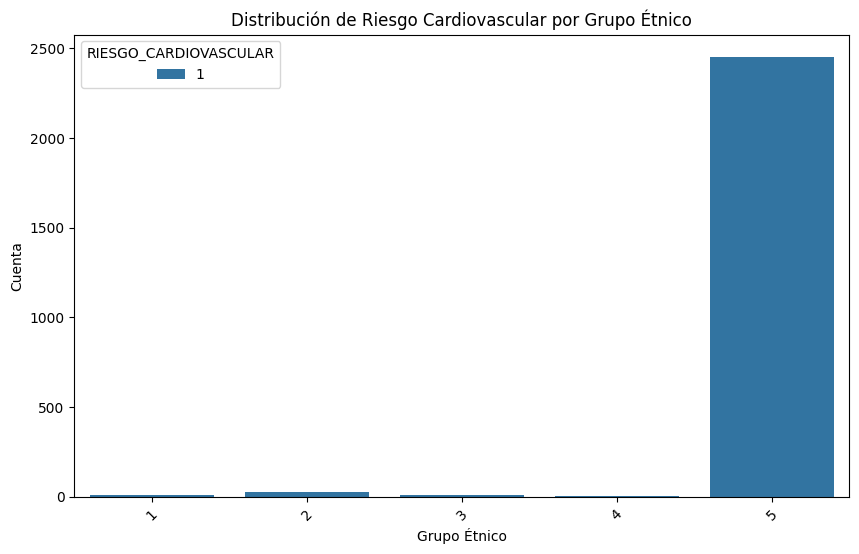

In [ ]:

# Paso 1: Preprocesar los datos
# Convertir el riesgo cardiovascular y el grupo étnico a categórico si no lo están
df['GRUPO_ETNICO'] = df['GRUPO_ETNICO'].astype('category')
df['RIESGO_CARDIOVASCULAR'] = df['RIESGO_CARDIOVASCULAR'].astype('category')

# Verificar valores únicos de riesgo cardiovascular y grupos étnicos
print(df['GRUPO_ETNICO'].unique())
print(df['RIESGO_CARDIOVASCULAR'].unique())

# Paso 2: Crear una tabla de contingencia entre GRUPO_ETNICO y RIESGO_CARDIOVASCULAR
tabla_contingencia = pd.crosstab(df['GRUPO_ETNICO'], df['RIESGO_CARDIOVASCULAR'])
print("\nTabla de Contingencia:")
print(tabla_contingencia)

# Paso 3: Realizar la prueba de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

# Imprimir los resultados de la prueba de Chi-cuadrado
print(f"\nEstadístico Chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
print(f"Grados de libertad: {dof}")
print("\nTabla esperada (frecuencias esperadas si no hubiera asociación):")
print(np.round(expected, 2))

# Paso 4: Visualizar los resultados con un gráfico de barras
plt.figure(figsize=(10,6))
sns.countplot(x='GRUPO_ETNICO', hue='RIESGO_CARDIOVASCULAR', data=df)
plt.title('Distribución de Riesgo Cardiovascular por Grupo Étnico')
plt.xlabel('Grupo Étnico')
plt.ylabel('Cuenta')
plt.xticks(rotation=45)
plt.show()

#4. Diferencias Étnicas en el Índice de Masa Corporal (IMC)

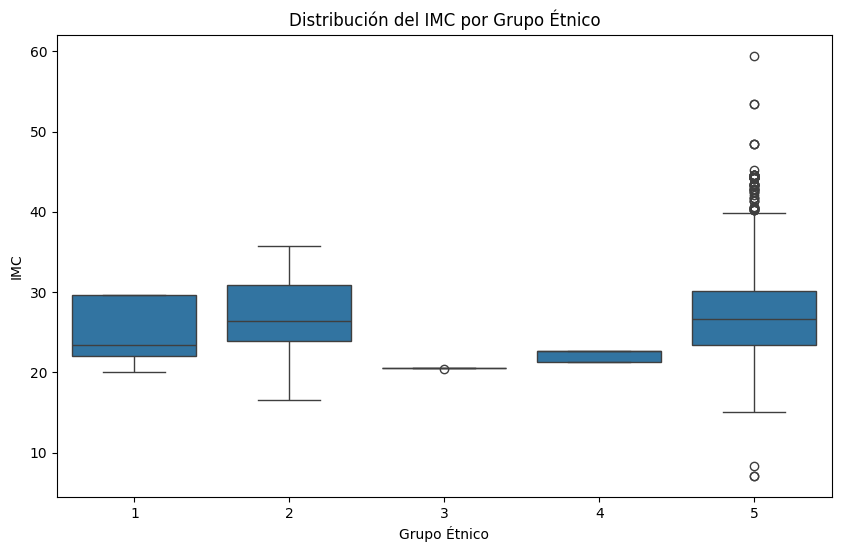

Grupo Étnico: 5, p-value de Shapiro-Wilk: 1.686634063769877e-19
El grupo 5 no parece tener una distribución normal.
Grupo Étnico: 2, p-value de Shapiro-Wilk: 0.5779142334840649
El grupo 2 parece tener una distribución normal.
Grupo Étnico: 3, p-value de Shapiro-Wilk: 3.2174928627621425e-07
El grupo 3 no parece tener una distribución normal.
Grupo Étnico: 1, p-value de Shapiro-Wilk: 0.02975865510756995
El grupo 1 no parece tener una distribución normal.
Grupo Étnico: 4, p-value de Shapiro-Wilk: 0.008724679273366858
El grupo 4 no parece tener una distribución normal.


In [ ]:



# Asegúrate de que la columna 'IMC' y 'GRUPO_ETNICO' no tengan valores nulos
df = df[['IMC', 'GRUPO_ETNICO']].dropna()

# Gráfico Boxplot para visualizar la distribución de IMC por grupo étnico
plt.figure(figsize=(10, 6))
sns.boxplot(x='GRUPO_ETNICO', y='IMC', data=df)
plt.title('Distribución del IMC por Grupo Étnico')
plt.xlabel('Grupo Étnico')
plt.ylabel('IMC')
plt.show()
# Comprobar normalidad para cada grupo étnico
for grupo in df['GRUPO_ETNICO'].unique():
    datos_grupo = df[df['GRUPO_ETNICO'] == grupo]['IMC']
    _, p_value = shapiro(datos_grupo)
    print(f"Grupo Étnico: {grupo}, p-value de Shapiro-Wilk: {p_value}")
    if p_value > 0.05:
        print(f"El grupo {grupo} parece tener una distribución normal.")
    else:
        print(f"El grupo {grupo} no parece tener una distribución normal.")



##Relación entre el IMC y la Salud Mental

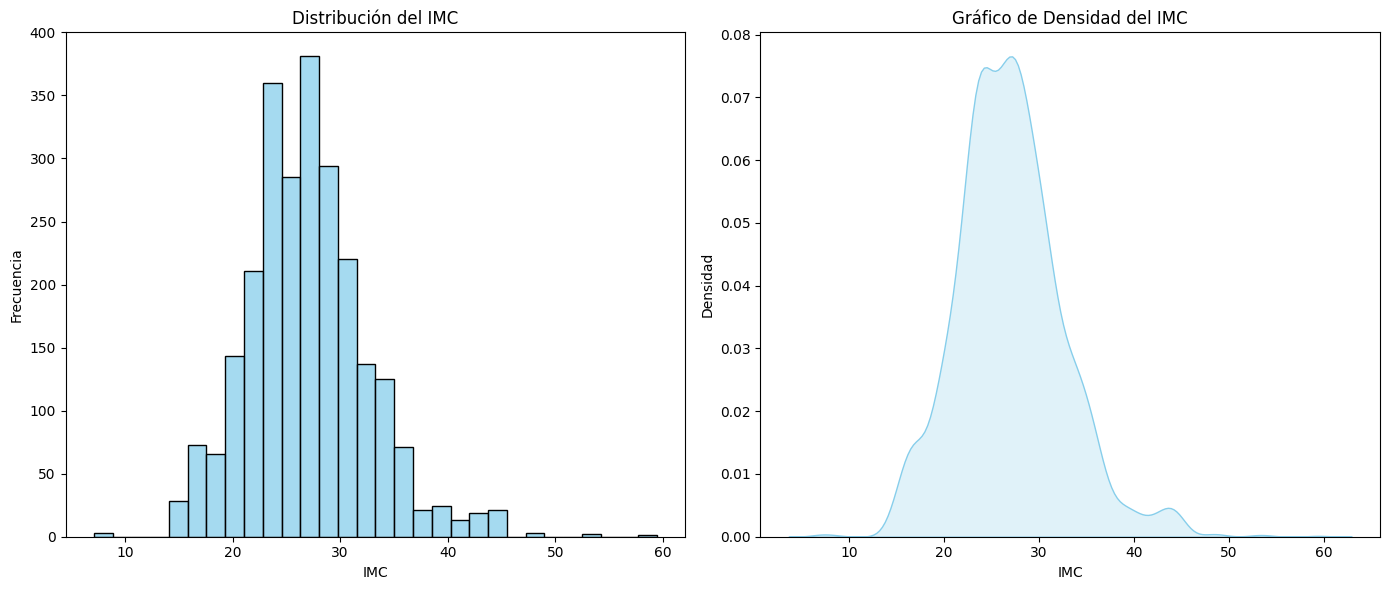

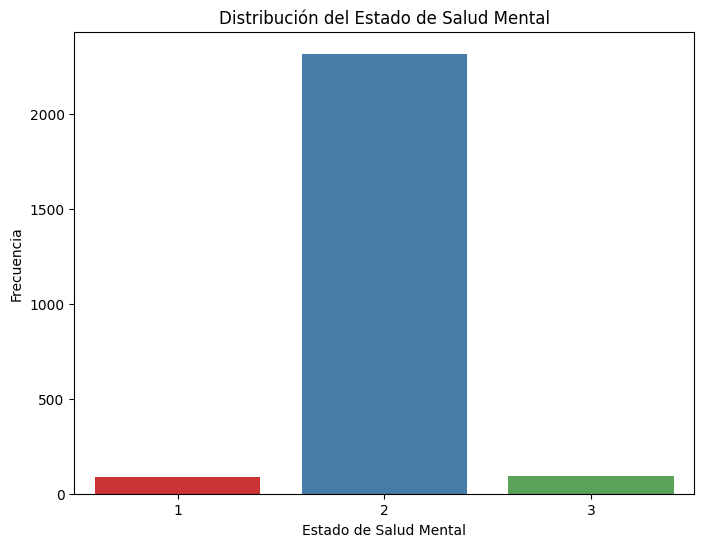

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma y gráfico de densidad del IMC
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['IMC'], bins=30, kde=False, color='skyblue')
plt.title('Distribución del IMC')
plt.xlabel('IMC')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.kdeplot(df['IMC'], fill=True, color='skyblue')
plt.title('Gráfico de Densidad del IMC')
plt.xlabel('IMC')
plt.ylabel('Densidad')

plt.tight_layout()
plt.show()

# Gráfico de barras para la distribución del Estado de Salud Mental
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='MENTAL', hue='MENTAL', palette='Set1', dodge=False, legend=False)
plt.title('Distribución del Estado de Salud Mental')
plt.xlabel('Estado de Salud Mental')
plt.ylabel('Frecuencia')
plt.show()
